# Feature Selection Experiment

In [2]:
from sklearn.feature_selection import mutual_info_regression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.set_context('paper')


In [3]:
df_pollutants = pd.read_csv('../data/cached_air_pollution_data.csv')
df_climate = pd.read_csv('../data/cached_openweather_data.csv')

In [4]:
df_combined = df_climate.join(df_pollutants.set_index(['latitude', 'longitude']), on=['latitude', 'longitude'], how='left')
df_combined = df_combined.loc[:, df_combined.columns.difference(['no', 'nh3'])]

In [5]:
df_combined

,clouds_all,co,feels_like,humidity,latitude,longitude,no2,o3,pm10,pm2_5,pressure,so2,temp,temp_max,temp_min,wind_deg,wind_speed
0,20.0,277.04,271.01,90.0,-0.247524,51.417281,0.03,42.56,1.09,0.75,1009.0,0.01,273.95,275.94,272.26,10.0,2.57
1,20.0,277.04,271.01,90.0,-0.247524,51.418035,0.03,42.56,1.09,0.75,1009.0,0.01,273.95,275.94,272.26,10.0,2.57
2,20.0,277.04,271.01,90.0,-0.247524,51.418789,0.03,42.56,1.09,0.75,1009.0,0.01,273.95,275.94,272.26,10.0,2.57
3,20.0,277.04,271.01,90.0,-0.247524,51.419542,0.03,42.56,1.09,0.75,1009.0,0.01,273.95,275.94,272.26,10.0,2.57
4,20.0,277.04,271.01,90.0,-0.247524,51.420296,0.03,42.56,1.09,0.75,1009.0,0.01,273.95,275.94,272.26,10.0,2.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,75.0,283.72,272.15,84.0,0.122476,51.564266,0.04,50.78,1.70,1.34,1009.0,0.02,274.91,276.05,272.90,360.0,2.57
39996,75.0,283.72,272.15,84.0,0.122476,51.565020,0.04,50.78,1.70,1.34,1009.0,0.02,274.91,276.05,272.90,360.0,2.57
39997,75.0,283.72,272.15,84.0,0.122476,51.565774,0.04,50.78,1.70,1.34,1009.0,0.02,274.91,276.05,272.90,360.0,2.57
39998,75.0,283.72,272.15,84.0,0.122476,51.566527,0.04,50.78,1.70,1.34,1009.0,0.02,274.91,276.05,272.90,360.0,2.57


In [6]:
df_corr = df_combined.corr().loc[df_climate.columns,df_pollutants.columns.difference(['no', 'nh3', 'latitude', 'longitude'])]

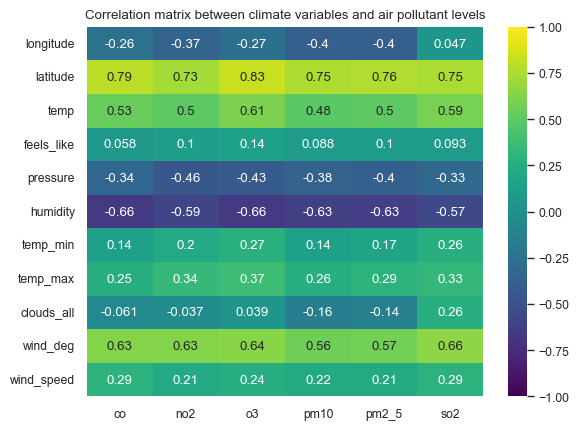

In [33]:
heatmap = sns.heatmap(df_corr, annot=True, vmin=-1, vmax=1, cmap='viridis')
heatmap.set_title('Correlation matrix between climate variables and air pollutant levels')
plt.savefig('../figs/heatmap.pdf', bbox_inches='tight')
plt.savefig('../figs/heatmap.png', bbox_inches='tight')

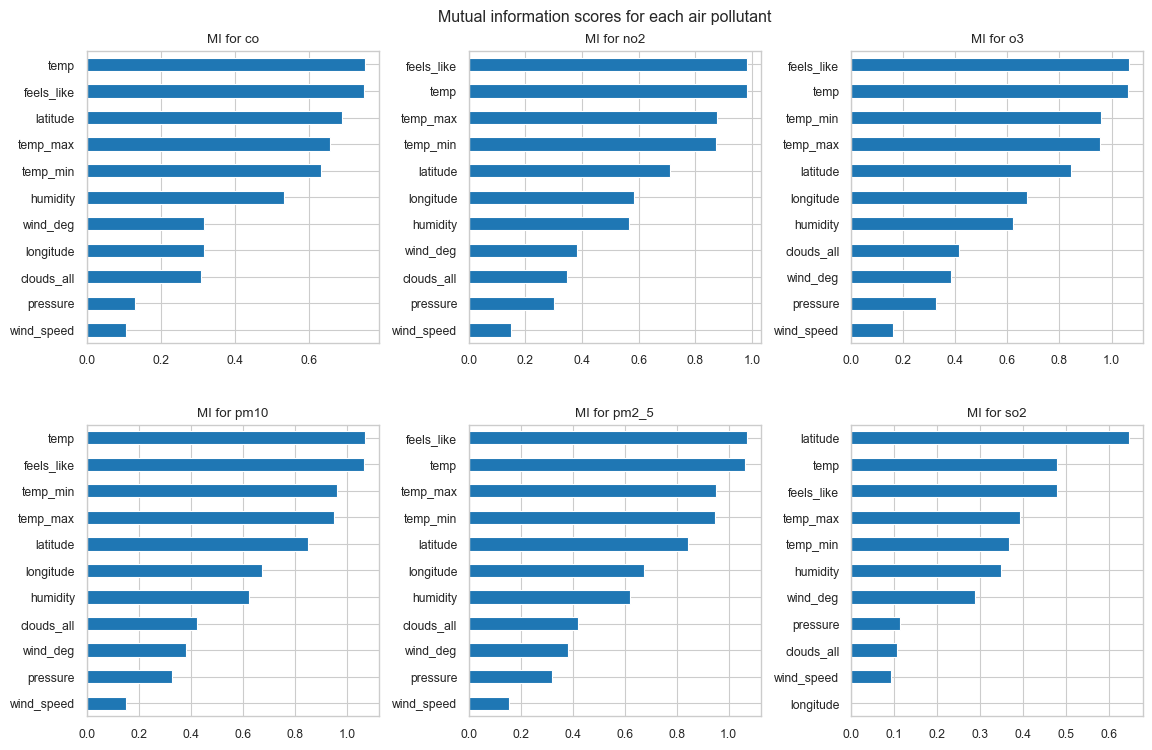

In [31]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
fig.tight_layout(pad=4.0)

axs = axs.flatten()

for i, target in enumerate(df_pollutants.columns.difference(['no', 'nh3', 'latitude', 'longitude'])):
	mi = mutual_info_regression(df_combined[df_climate.columns], df_combined[target])
	mutual_info = pd.Series(mi)
	mutual_info.index = df_climate.columns
	
	mutual_info.sort_values().plot.barh(title=f"MI for {target}", ax=axs[i])
fig.suptitle('Mutual information scores for each air pollutant')
fig.savefig('../figs/mutual_info.pdf')
fig.savefig('../figs/mutual_info.png')

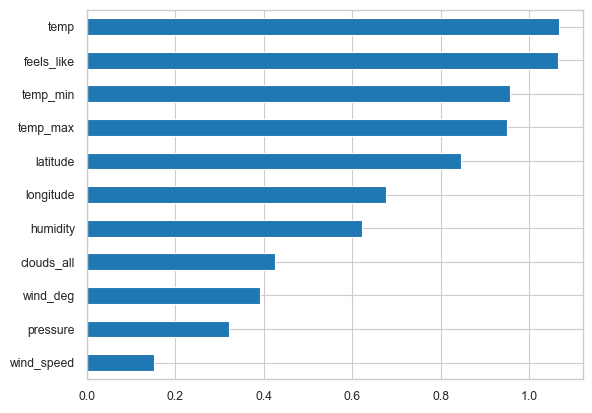

In [30]:
mi = mutual_info_regression(df_combined[df_climate.columns], df_pollutants['pm2_5'])
mutual_info = pd.Series(mi)
mutual_info.index = df_climate.columns

mutual_info.sort_values().plot.barh()

plt.savefig("../figs/pm2_5_mi.pdf", bbox_inches='tight')
plt.savefig("../figs/pm2_5_mi.png", bbox_inches='tight')